In [ ]:
4import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols

# Part 1: Import Data and Data Cleaning
We got the data from Spotify API, the detailed explanation of features can be founded in: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [ ]:
# Load the data
data_2018 = pd.read_csv('Spotify Data by Year/spotify_2018.csv')
data_2019 = pd.read_csv('Spotify Data by Year/spotify_2019.csv')
data_2020 = pd.read_csv('Spotify Data by Year/spotify_2020.csv')
data_2021 = pd.read_csv('Spotify Data by Year/spotify_2021.csv')
data_2022 = pd.read_csv('Spotify Data by Year/spotify_2022.csv')
data_2023 = pd.read_csv('Spotify Data by Year/spotify_2023.csv')

In [ ]:
data_2022

,Artist and Title,Daily Streams,Streams,acousticness,analysis_url,artist_name,danceability,duration_ms,energy,id,...,mode,popularity,song_name,speechiness,tempo,time_signature,track_href,type,uri,valence
0,"['Harry Styles', 'As It Was']","1,618,590","3,633,339,736",0.34200,https://api.spotify.com/v1/audio-analysis/4Dvk...,harry styles,0.520,167303.0,0.731,4Dvkj6JhhA12EX05fT7y2e,...,0.0,87.0,as it was,0.0557,173.930,4.0,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,audio_features,spotify:track:4Dvkj6JhhA12EX05fT7y2e,0.662
1,"['SZA', 'Kill Bill']","1,918,330","2,186,838,653",0.05210,https://api.spotify.com/v1/audio-analysis/1Qrg...,sza,0.644,153947.0,0.735,1Qrg8KqiBpW07V7PNxwwwL,...,1.0,86.0,kill bill,0.0391,88.980,4.0,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,audio_features,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,0.418
2,"['Manuel Turizo', 'La Bachata']","1,040,570","1,980,184,177",0.58300,https://api.spotify.com/v1/audio-analysis/3tt9...,manuel turizo,0.835,162638.0,0.679,3tt9i3Hhzq84dPS8H7iSiJ,...,0.0,82.0,la bachata,0.0364,124.980,4.0,https://api.spotify.com/v1/tracks/3tt9i3Hhzq84...,audio_features,spotify:track:3tt9i3Hhzq84dPS8H7iSiJ,0.850
3,"['Bad Bunny', 'Me Porto Bonito']","730,921","1,943,322,630",0.09010,https://api.spotify.com/v1/audio-analysis/6Sq7...,bad bunny,0.911,178567.0,0.712,6Sq7ltF9Qa7SNFBsV5Cogx,...,0.0,81.0,me porto bonito,0.0817,92.005,4.0,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,audio_features,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,0.425
4,"['David Guetta', 'I’m Good (Blue)']","1,387,697","1,889,030,676",0.00383,https://api.spotify.com/v1/audio-analysis/4uUG...,david guetta,0.561,175238.0,0.965,4uUG5RXrOk84mYEfFvj3cK,...,0.0,85.0,i’m good (blue),0.0343,128.040,4.0,https://api.spotify.com/v1/tracks/4uUG5RXrOk84...,audio_features,spotify:track:4uUG5RXrOk84mYEfFvj3cK,0.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,"['İrem Derici', 'Yaz Gülü']","39,018","100,668,743",NaN,NaN,i̇rem derici,NaN,NaN,NaN,NaN,...,NaN,NaN,yaz gülü,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,"['Dax', 'Dear Alcohol']","76,351","100,632,446",0.25800,https://api.spotify.com/v1/audio-analysis/7Bg1...,dax,0.817,236308.0,0.501,7Bg1pphdvxWtvYqGGdqSOk,...,1.0,61.0,dear alcohol,0.0481,129.979,4.0,https://api.spotify.com/v1/tracks/7Bg1pphdvxWt...,audio_features,spotify:track:7Bg1pphdvxWtvYqGGdqSOk,0.408
938,"['Prince Narula', 'Todh']",NaN,"100,531,458",0.40200,https://api.spotify.com/v1/audio-analysis/7FVg...,prince narula,0.549,236800.0,0.748,7FVgT8XjxUSfKuZuHxg316,...,0.0,62.0,todh,0.3840,149.722,4.0,https://api.spotify.com/v1/tracks/7FVgT8XjxUSf...,audio_features,spotify:track:7FVgT8XjxUSfKuZuHxg316,0.781
939,"['Megan Thee Stallion', 'Plan B']","63,482","100,465,226",0.06740,https://api.spotify.com/v1/audio-analysis/3A4U...,megan thee stallion,0.898,163765.0,0.522,3A4U3uNNsMaI1vWBey3VYH,...,1.0,57.0,plan b,0.3370,85.054,4.0,https://api.spotify.com/v1/tracks/3A4U3uNNsMaI...,audio_features,spotify:track:3A4U3uNNsMaI1vWBey3VYH,0.675


In [ ]:
def clean_and_process_data(data, column_mapping):
    """
    clean and preprocess the data, mapping the column names and selecting the required columns

    parameters:
    data (DataFrame): the data originally loaded from the CSV file.
    column_mapping (dict): a dictionary that maps the original column names to the new column names.

    return:
    DataFrame: the cleaned and processed data.
    """

    data.rename(columns=column_mapping, inplace=True)

    # choose required columns
    required_columns = ['id', 'artist_name', 'track_name', 'daily_streams', 'streams',
                        'acousticness', 'danceability', 'duration_ms', 'energy',
                        'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
                        'tempo', 'valence', 'popularity']
    data = data[required_columns]

    # convert 'daily_streams' and 'streams' column into float
    data['daily_streams'] = data['daily_streams'].apply(lambda x: str(x).replace(',', '')).astype(float)
    data['streams'] = data['streams'].apply(lambda x: str(x).replace(',', '')).astype(int)

    data.dropna(inplace=True)

    return data

# mapping
column_mappings = {
    2018: {
        'song_name': 'track_name',
        'stream': 'streams',
        'Daily Streams': 'daily_streams'
    },
    2019: {
        'song_name': 'track_name',
        'stream': 'streams',
        'Daily Streams': 'daily_streams'
    },
    2020: {
        'song_name': 'track_name',
        'stream': 'streams',
        'Daily Streams': 'daily_streams'
    },
    2021: {
        'song_name': 'track_name',
        'stream': 'streams',
        'Daily Streams': 'daily_streams'
    },
    2022: {
        'song_name': 'track_name',
        'Streams': 'streams',
        'Daily Streams': 'daily_streams'
    },
    2023: {
        'song_name': 'track_name',
        'Streams': 'streams',
        'Daily Streams': 'daily_streams'
    }
}


In [ ]:
# clean and process the data
df_2018 = clean_and_process_data(data_2018, column_mappings[2018])
df_2019 = clean_and_process_data(data_2019, column_mappings[2019])
df_2020 = clean_and_process_data(data_2020, column_mappings[2020])
df_2021 = clean_and_process_data(data_2021, column_mappings[2021])
df_2022 = clean_and_process_data(data_2022, column_mappings[2022])
df_2023 = clean_and_process_data(data_2023, column_mappings[2023])

len(df_2018), len(df_2019), len(df_2020), len(df_2021), len(df_2022), len(df_2023)

(1024, 1042, 1018, 1012, 936, 884)

In [ ]:
# import pandas as pd
#
# df_2018['year'] = 2018
# df_2019['year'] = 2019
# df_2020['year'] = 2020
# df_2021['year'] = 2021
# df_2022['year'] = 2022
# df_2023['year'] = 2023
#
spotify_data = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
#
# # Check the combined DataFrame
# spotify_data.head()
# # save to file
spotify_data.to_csv('spotify_combined.csv', index=False)


# Part 2: Initial Simple Regression:
 ## 2.1 Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Using all the data from 2018 to 2023
dataframes = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate all the dataframes
spotify_data = pd.concat(dataframes, ignore_index=True)

print(spotify_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5916 non-null   object 
 1   artist_name       5916 non-null   object 
 2   track_name        5916 non-null   object 
 3   daily_streams     5916 non-null   float64
 4   streams           5916 non-null   int64  
 5   acousticness      5916 non-null   float64
 6   danceability      5916 non-null   float64
 7   duration_ms       5916 non-null   float64
 8   energy            5916 non-null   float64
 9   instrumentalness  5916 non-null   float64
 10  key               5916 non-null   float64
 11  liveness          5916 non-null   float64
 12  loudness          5916 non-null   float64
 13  speechiness       5916 non-null   float64
 14  tempo             5916 non-null   float64
 15  valence           5916 non-null   float64
 16  popularity        5916 non-null   float64


Text(0.5, 1.0, 'Distribution of Popularity Scores')

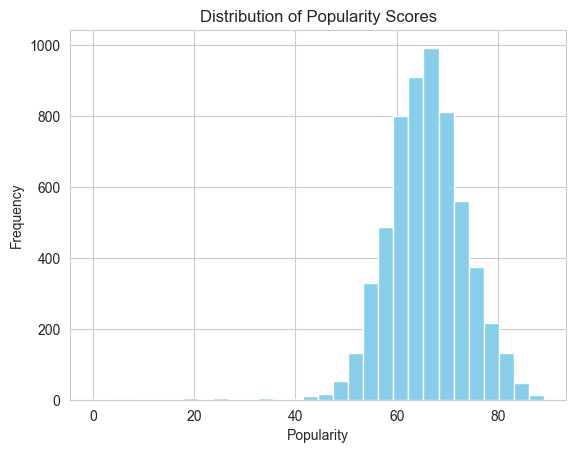

In [ ]:
plt.hist(spotify_data['popularity'], bins=30, color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores')

In [ ]:
# define the features
X = spotify_data[['acousticness', 'danceability', 'energy', 'tempo',
                  'instrumentalness', 'liveness', 'loudness', 'key',
                  'speechiness', 'valence']]
# X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable

y = spotify_data['daily_streams']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [ ]:
X_train

,acousticness,danceability,energy,tempo,instrumentalness,liveness,loudness,key,speechiness,valence
5269,-0.841389,-0.671623,1.285120,0.796006,-0.190789,-0.020887,0.378205,0.202358,0.048812,0.390768
4677,-1.062735,-1.572121,1.389502,0.741819,-0.189362,1.252298,1.835191,-0.077466,-0.402303,-0.104239
2776,-0.921247,0.822060,1.256125,-1.061752,-0.192016,-0.274190,1.624633,-0.916936,-0.614479,0.535327
5150,-0.853916,0.729151,-0.402390,-0.038447,-0.192016,-0.567489,-0.593370,-1.196760,-0.125135,-1.944524
1700,-0.712599,1.629649,1.134346,-0.650629,-0.192016,-0.194200,1.222693,-0.077466,-0.365028,1.017192
...,...,...,...,...,...,...,...,...,...,...
3772,-0.499254,0.872087,0.287691,1.358230,-0.192016,-0.507496,0.633882,-1.196760,2.724916,-0.077955
5191,-0.436620,0.864940,-0.750330,-0.446876,-0.191752,-0.664811,-1.167892,-1.476583,-0.734904,-1.931821
5226,-0.389645,-0.235668,1.348909,-1.469907,-0.192016,3.878657,0.031912,-0.357289,1.033236,0.465238
5390,-0.385731,1.043611,1.354708,0.234736,-0.191819,-0.534160,0.691410,0.762004,-0.762621,2.011586


In [ ]:
# initialize the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

print("Regression Coeff:", model.coef_)
print("Intercepts:", model.intercept_)
print("R^2:", model.score(X_train, y_train))

Regression Coeff: [  6465.90851832 -13112.29620799  -4920.51010705  -3490.94368155
   3708.11641564  -2648.15006023  -5617.67822522   4836.33126899
 -16214.36446453  -4009.96723377]
Intercepts: 163421.92413355876
R^2: 0.02269648701368776


In [ ]:
import statsmodels.api as sm

# Add constant column to the features (intercept term)
X_train_const = sm.add_constant(X_train)

# Fit the model
model_ols = sm.OLS(y_train, X_train_const)
results = model_ols.fit()

# Display the summary, which includes F-statistic and its p-value
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          daily_streams   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     10.96
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.08e-18
Time:                        19:47:16   Log-Likelihood:                -64699.
No. Observations:                4732   AIC:                         1.294e+05
Df Residuals:                    4721   BIC:                         1.295e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.634e+05   3052.753     53.533      0.000    1.57e+05    1.69e+05
acousticness      6465.9085   3747.341      1.725      0.085    -880.628    1.38e+04
danceability     -1.311e+04   3534.645     -3.710      0.000      -2e+04   -6182.742
energy           -4920.5101   5097.874     -0.965      0.334   -1.49e+04    5073.701
tempo            -3490.9437   3150.650     -1.108      0.268   -9667.688    2685.800
instrumentalness  3708.1164   3179.350      1.166      0.244   -2524.893    9941.126
liveness         -2648.1501   3134.550     -0.845      0.398   -8793.330    3497.030
loudness         -5617.6782   4667.021     -1.204      0.229   -1.48e+04    3531.860
key               4836.3313   3063.336      1.579      0.114   -1169.237    1.08e+04
speechiness      -1.621e+04   3189.005     -5.084      0.000   -2.25e+04   -9962.427
valence          -4009.9672   3603.809     -1.113      0.266   -1.11e+04    3055.180
==============================================================================
Omnibus:                     4026.589   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127545.060
Skew:                           3.985   Prob(JB):                         0.00
Kurtosis:                      27.153   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" (MSE):", mse)
print(" (R^2):", r2)

 (MSE): 46327047939.20392
 (R^2): 0.04512160325929293


In [ ]:
key_mapping = {
    'key_0.0': 'C',
    'key_1.0': 'C#',
    'key_2.0': 'D',
    'key_3.0': 'D#',
    'key_4.0': 'E',
    'key_5.0': 'F',
    'key_6.0': 'F#',
    'key_7.0': 'G',
    'key_8.0': 'G#',
    'key_9.0': 'A',
    'key_10.0': 'A#',
    'key_11.0': 'B'
}


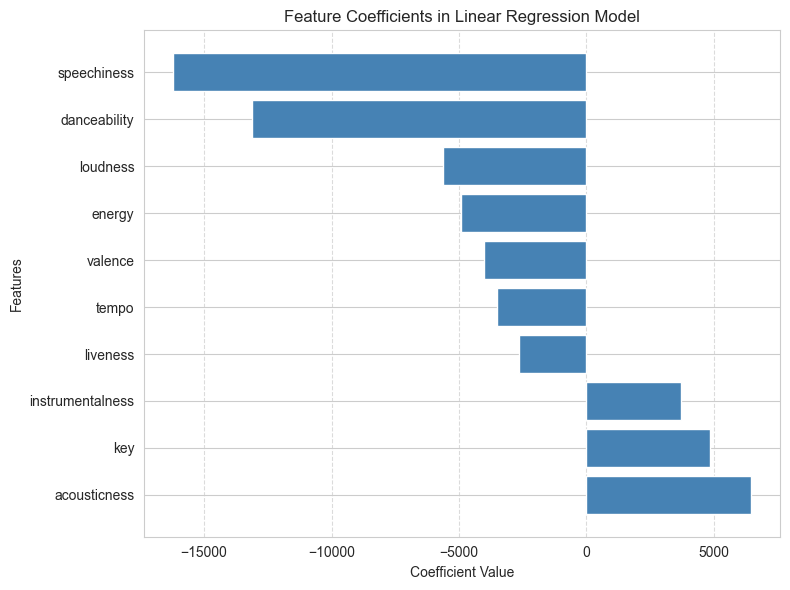

In [ ]:
coefficients = model.coef_
features = X_train.columns

features_mapped = [key_mapping[feat] if feat in key_mapping else feat for feat in features]

coef_df = pd.DataFrame({'Feature': features_mapped, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in Linear Regression Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 2.2 Random Forest

### 2.2.1 GridSearch: Find the best parameter in Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Using all the data from 2018 to 2023
dataframes = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate all the dataframes
data = pd.concat(dataframes, ignore_index=True)

# Choose the features and target variable, 'popularity' as the target variable
X = data[['acousticness', 'danceability', 'duration_ms',
          'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
          'tempo', 'valence']]
# X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable
y = data['popularity']

# seperate training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(50, 100, 200), #the number of trees
     'max_depth':(10, 15, 20, 30),
     'min_samples_split': (8, 12, 16),
     'min_samples_leaf': (4,8)
}
rf_model_gs = GridSearchCV(RandomForestRegressor(), parameters, cv=3)
    ## 3-fold cross validation:
rf_model_gs.fit(X_train, np.ravel(y_train))
rf_model_gs.best_score_, rf_model_gs.best_params_

(0.034967776499792734,
 {'max_depth': 20,
  'min_samples_leaf': 4,
  'min_samples_split': 8,
  'n_estimators': 200})

In [ ]:
# Build random forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=8, min_samples_leaf=4, random_state=42)
rf_model.fit(X_train, y_train)

# prediction
y_pred = rf_model.predict(X_test)

# Evaluation on model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 56.26
R² Score: 0.11


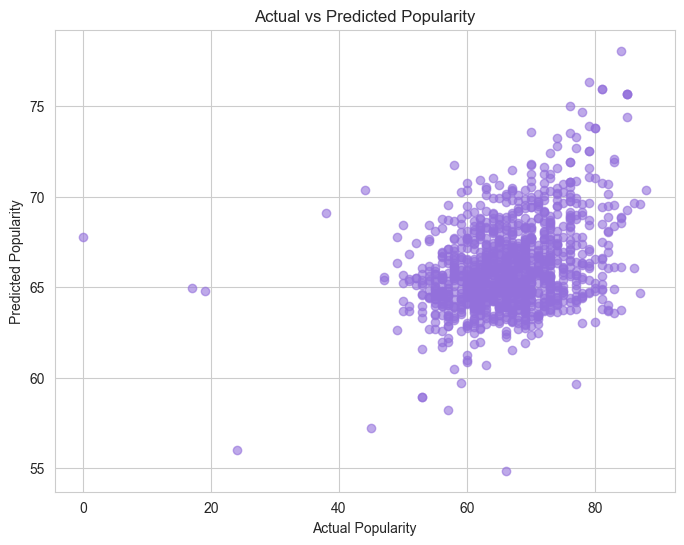

/var/folders/xf/t9mdp7cn0f911_dgjxqwf0n80000gn/T/ipykernel_7380/1534148042.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


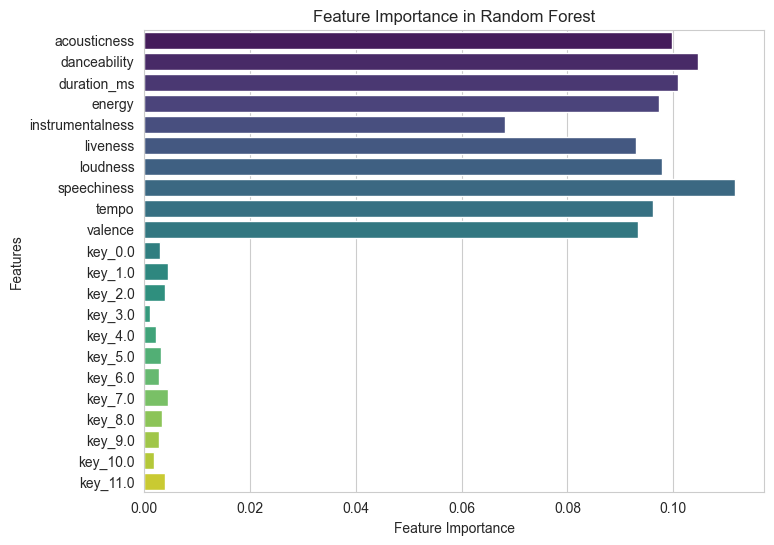

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumpurple')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.grid(True)
plt.show()


# importance of features
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.grid(True, axis='x')
plt.show()


## 2.3 Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = data[['acousticness', 'danceability', 'duration_ms',
          'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
          'tempo', 'valence']]
X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso = Lasso()

param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# get the best model
best_lasso = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_['alpha'])


Best alpha: 0.1


In [ ]:
# prediction
y_pred = best_lasso.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lasso.coef_
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

print(coefficients)

mapped_features = [key_mapping[feat] if feat in key_mapping else feat for feat in X.columns]

coefficients = pd.DataFrame({
    'Feature': mapped_features,
    'Coefficient': best_lasso.coef_
}).sort_values(by='Coefficient', ascending=False)


Mean Squared Error (MSE): 62.28
R² Score: 0.02
             Feature  Coefficient
7        speechiness    -0.329315
6           loudness    -0.292919
3             energy    -0.253680
9            valence    -0.231964
18           key_8.0     0.177804
0       acousticness     0.137111
21          key_11.0     0.135190
12           key_2.0    -0.128008
1       danceability    -0.110729
5           liveness    -0.088983
8              tempo     0.000000
4   instrumentalness     0.000000
10           key_0.0    -0.000000
13           key_3.0    -0.000000
14           key_4.0    -0.000000
15           key_5.0     0.000000
16           key_6.0     0.000000
17           key_7.0    -0.000000
2        duration_ms    -0.000000
19           key_9.0     0.000000
20          key_10.0    -0.000000
11           key_1.0    -0.000000


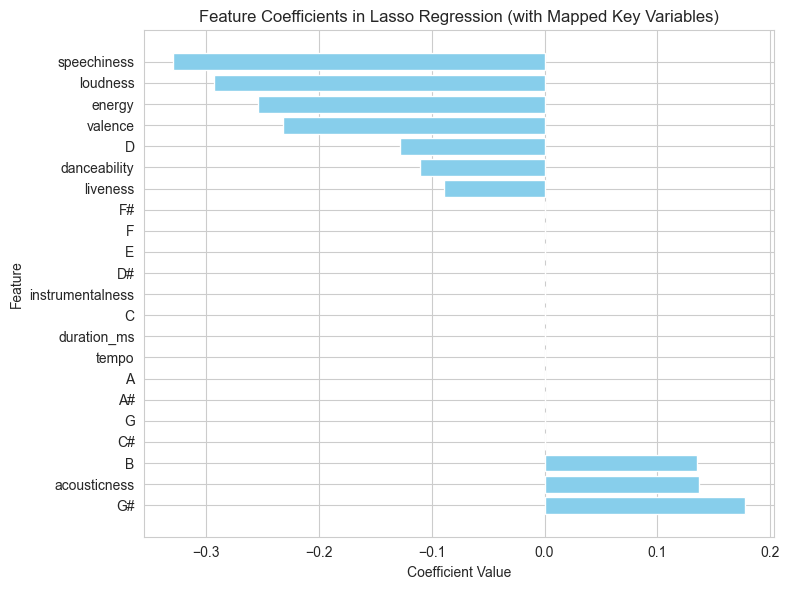

In [ ]:
# plot the coefficients
plt.figure(figsize=(8, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients in Lasso Regression (with Mapped Key Variables)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Part 3: Analysis on music track

Since using the features from Spotify API cannot give us a good result, we tried to get musical features directly fromt the music itself. \
The audio file was downloaded by Spotify API, then extract the music features (521 features) from Yamnet, which ia a pretrained model can extract sound features.
### 3.1 Download music tracks

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Spotify API
CLIENT_ID = "1656aba538ac46ec90faeee4214f0169"
CLIENT_SECRET = "7cf73c012bef4557a88b8d98717cabda"

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

In [ ]:
def get_preview_url(track_id: str) -> str:
    """
    get preview_url based on the track_id from Spotify API

    parameters:
        track_id (str): track's Spotify ID

    Return:
        str: preview_url，which is a 30-second preview of the track.
            if not available, return "Preview URL not available for this track."
    """
    try:
        track_info = sp.track(track_id)
        preview_url = track_info.get('preview_url')
        if preview_url:
            return preview_url
        else:
            return "Preview URL not available for this track."
    except Exception as e:
        return f"Error: {e}"

In [ ]:
def top_song_preview_url(song_data: pd.DataFrame) -> dict:
    """
    Get the preview url of the top 10 songs

    Parameters:
    song_data (DataFrame): a Pandas DataFrame with 'id' and 'track_name' columns

    Returns:
    dict: a dictionary with track names as keys and preview URLs as values
    """
    preview_urls = {}

    # make sure the DataFrame has 'id' and 'track_name' columns,
    # # and select the top 10 songs
    song_info = song_data[['id', 'track_name']]

    for _, row in song_info.iterrows():
        track_id = row['id']
        track_name = row['track_name']

        # get preview_url
        preview_url = get_preview_url(track_id)
        preview_urls[track_name] = preview_url

    return preview_urls

In [ ]:
# # use 2022 and 2023 most popular songs info as source
## commenting these only because it takes a long time to run
## preview_url_2022 = top_song_preview_url(df_2022)
## len(preview_url_2022)

KeyboardInterrupt: 

In [ ]:
# commenting these only because it takes a long time to run,
## preview_url_2023 = top_song_preview_url(df_2023)
## preview_url_2023

{'flowers': 'https://p.scdn.co/mp3-preview/5184d19d1b7fcc3e7c067e38af45a7cc80851440?cid=1656aba538ac46ec90faeee4214f0169',
 'seven': 'https://p.scdn.co/mp3-preview/c6f315711a77fba52139f54587afa7e7d16a1232?cid=1656aba538ac46ec90faeee4214f0169',
 "i ain't worried": 'Preview URL not available for this track.',
 'greedy': 'https://p.scdn.co/mp3-preview/ca7bdcb691fb64a5af8a3253b89356390664fcf1?cid=1656aba538ac46ec90faeee4214f0169',
 'one of the girls': 'Preview URL not available for this track.',
 'daylight': 'Preview URL not available for this track.',
 'ella baila sola': 'https://p.scdn.co/mp3-preview/5d39f3e17f1e20e2711d033001e48b8d4249b992?cid=1656aba538ac46ec90faeee4214f0169',
 'my love mine all mine': 'https://p.scdn.co/mp3-preview/2f90c9a6a2b6e38554d3bc3cf7512c2c70ac67b9?cid=1656aba538ac46ec90faeee4214f0169',
 'like crazy': 'https://p.scdn.co/mp3-preview/2db5f36096963d97afc870c50990d62d27858a43?cid=1656aba538ac46ec90faeee4214f0169',
 'lose control': 'https://p.scdn.co/mp3-preview/51e

In [ ]:
import os
import requests

def download_audio_files(preview_urls, save_dir="audio_files"):
    """
    download 2022 and 2023 preview mp3 files

    parameters:
        preview_urls (dict): dict, "track_name": preview_url
        save_dir (str): directory of saving the file

    return:
        None
    """
    # create the directory of mp3 files
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # download mo3 files
    for track_name, url in preview_urls.items():
        if url is None or "Error" in url or url == "Preview URL not available for this track.":
            print(f"Skipping {track_name}: Invalid or unavailable URL.")
            continue

        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()

            # file path
            file_path = os.path.join(save_dir, f"{track_name}.mp3")

            # save the mp3 file
            with open(file_path, "wb") as audio_file:
                for chunk in response.iter_content(chunk_size=1024):
                    audio_file.write(chunk)

            print(f"Downloaded: {track_name} -> {file_path}")
        except Exception as e:
            print(f"Failed to download {track_name}: {e}")


In [ ]:
'''comment these only because the mp3 files have been downloaded, if you want to download again, please uncomment'''
# download_audio_files(preview_url_2022)

Downloaded: as it was -> audio_files/as it was.mp3
Downloaded: kill bill -> audio_files/kill bill.mp3
Downloaded: la bachata -> audio_files/la bachata.mp3
Downloaded: me porto bonito -> audio_files/me porto bonito.mp3
Downloaded: i’m good (blue) -> audio_files/i’m good (blue).mp3
Downloaded: quevedo: bzrp music sessions, vol. 52 -> audio_files/quevedo: bzrp music sessions, vol. 52.mp3
Skipping anti-hero: Invalid or unavailable URL.
Skipping unholy: Invalid or unavailable URL.
Downloaded: tití me preguntó -> audio_files/tití me preguntó.mp3
Downloaded: ojitos lindos -> audio_files/ojitos lindos.mp3
Skipping calm down: Invalid or unavailable URL.
Skipping creepin': Invalid or unavailable URL.
Skipping bones: Invalid or unavailable URL.
Downloaded: glimpse of us -> audio_files/glimpse of us.mp3
Downloaded: efecto -> audio_files/efecto.mp3
Skipping romantic homicide: Invalid or unavailable URL.
Skipping provenza: Invalid or unavailable URL.
Skipping stick season: Invalid or unavailable URL

In [ ]:
# download_audio_files(preview_url_2023)

Downloaded: flowers -> audio_files/flowers.mp3
Downloaded: seven -> audio_files/seven.mp3
Skipping i ain't worried: Invalid or unavailable URL.
Downloaded: greedy -> audio_files/greedy.mp3
Skipping one of the girls: Invalid or unavailable URL.
Skipping daylight: Invalid or unavailable URL.
Downloaded: ella baila sola -> audio_files/ella baila sola.mp3
Downloaded: my love mine all mine -> audio_files/my love mine all mine.mp3
Downloaded: like crazy -> audio_files/like crazy.mp3
Downloaded: lose control -> audio_files/lose control.mp3
Downloaded: paint the town red -> audio_files/paint the town red.mp3
Skipping here with me: Invalid or unavailable URL.
Skipping vampire: Invalid or unavailable URL.
Downloaded: la bebe -> audio_files/la bebe.mp3
Skipping tqg: Invalid or unavailable URL.
Downloaded: un x100to -> audio_files/un x100to.mp3
Skipping what was i made for? [from the motion picture "barbie"]: Invalid or unavailable URL.
Skipping last night: Invalid or unavailable URL.
Skipping qlo

In [ ]:
import os
import librosa
import tensorflow as tf

In [ ]:
# load file paths, for future analyzing
audio_folder = "audio_files"
file_paths = [os.path.join(audio_folder, file) for file in os.listdir(audio_folder) if file.endswith('.mp3')]
print(len(file_paths))
file_paths

1230


['audio_files/pipoco.mp3',
 'audio_files/why not.mp3',
 'audio_files/noite fria.mp3',
 'audio_files/vampiros.mp3',
 'audio_files/le va doler.mp3',
 'audio_files/yet to come.mp3',
 'audio_files/picardía.mp3',
 'audio_files/no love.mp3',
 'audio_files/x eso bb.mp3',
 'audio_files/maan meri jaan.mp3',
 'audio_files/turn on the lights again...mp3',
 'audio_files/this year (blessings).mp3',
 'audio_files/cuatro veinte.mp3',
 'audio_files/the joker and the queen.mp3',
 'audio_files/peru.mp3',
 "audio_files/rahmatun lil'alameen.mp3",
 'audio_files/shadow.mp3',
 'audio_files/duki: bzrp music sessions, vol. 50.mp3',
 'audio_files/dua lipa.mp3',
 'audio_files/deep down.mp3',
 'audio_files/super shy.mp3',
 'audio_files/punto 40.mp3',
 'audio_files/chance.mp3',
 'audio_files/arasan da.mp3',
 'audio_files/la siguiente.mp3',
 'audio_files/about damn time.mp3',
 'audio_files/pegao.mp3',
 'audio_files/que vuelvas.mp3',
 'audio_files/plebada.mp3',
 'audio_files/manda um oi.mp3',
 'audio_files/lovin on 

### 3.2 Extract musical features using Yamnet

In [ ]:
import tensorflow_hub as hub
import soundfile as sf

In [ ]:
# Load the YAMNet model
yamnet_model = hub.load('https://www.kaggle.com/models/google/yamnet/TensorFlow2/yamnet/1')

def extract_yamnet_features(audio_path):
    """
    Extract audio score features using YAMNet.
    Score features are 521-dimensional embeddings.

    Parameters:
        audio_path (str): Path to the audio file.

    Returns:
        np.ndarray: Mean of 1024-dimensional embedding features.
    """
    try:
        # Load audio data and resample to 16kHz
        y, sr = librosa.load(audio_path, sr=16000)

        # Run the model to get embedding features
        scores, embeddings, spectrogram = yamnet_model(y)

        # Take the mean of scores features as input features
        features = np.mean(scores.numpy(), axis=0)

        # Extract song name from the file path and remove '.mp3'
        track_name = os.path.basename(audio_path).replace('.mp3', '')

        # Combine track_name with features into a single array
        return np.array([track_name, *features], dtype=object)

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None


In [ ]:
import os

yamnet_features = []
for path in file_paths:
    features = extract_yamnet_features(path)
    if features is not None:
        yamnet_features.append(features)

yamnet_features = pd.DataFrame(yamnet_features).rename(columns={0: 'song_name'})
yamnet_features

,song_name,1,2,3,4,5,6,7,8,9,...,512,513,514,515,516,517,518,519,520,521
0,pipoco,0.002265,0.001290,0.000024,0.000337,4.770871e-08,1.751112e-05,0.001932,3.380825e-04,0.001269,...,7.930073e-07,6.681104e-09,5.898273e-05,5.357132e-06,1.190296e-07,6.386619e-06,4.224625e-06,0.000013,0.000111,2.429153e-06
1,why not,0.000739,0.000003,0.000005,0.000058,3.829084e-12,1.348003e-05,0.000067,7.245274e-06,0.000079,...,1.981994e-06,7.015352e-07,1.443382e-04,2.092423e-04,2.024916e-06,3.171399e-03,1.820558e-04,0.000052,0.000211,1.774169e-04
2,noite fria,0.006906,0.000205,0.000145,0.001375,3.075072e-06,2.222059e-04,0.000118,1.652803e-05,0.000060,...,3.276121e-05,3.011018e-06,1.155685e-05,1.999736e-05,7.482494e-07,8.484816e-05,1.260657e-05,0.000171,0.000518,1.317486e-05
3,vampiros,0.002111,0.000148,0.000051,0.000147,6.005745e-08,5.441414e-05,0.000120,1.805179e-05,0.000083,...,1.216159e-06,2.231818e-08,5.758101e-07,4.907753e-07,2.233189e-08,1.764122e-05,1.103940e-06,0.000017,0.000084,1.571346e-06
4,le va doler,0.000653,0.000013,0.000001,0.000022,1.315299e-11,1.105267e-06,0.000237,1.921997e-05,0.000184,...,1.760487e-06,5.022026e-11,9.806605e-06,9.096065e-08,7.678263e-11,2.091489e-07,3.610901e-07,0.000010,0.000256,2.183385e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,de carolina,0.000379,0.000011,0.000011,0.000052,5.805370e-10,2.421306e-06,0.000297,7.038198e-05,0.000250,...,1.882154e-06,7.523587e-09,4.165115e-05,2.115708e-06,4.600731e-08,7.200694e-06,1.801338e-06,0.000009,0.000152,3.672969e-06
1226,glimpse of us,0.000251,0.000015,0.000002,0.000052,1.563871e-10,1.237009e-05,0.000007,2.024041e-07,0.000004,...,1.781981e-05,6.855026e-08,4.818972e-07,1.350611e-05,7.642833e-08,3.746969e-06,1.996013e-06,0.000043,0.000067,4.573202e-07
1227,fear and friday's,0.000395,0.000041,0.000002,0.000024,4.913697e-09,1.019633e-06,0.000041,2.182949e-06,0.000020,...,5.030123e-06,1.035525e-10,2.393919e-06,5.897948e-07,3.654055e-09,4.344340e-07,1.285727e-06,0.000021,0.000185,1.789141e-07
1228,grapejuice,0.000783,0.000117,0.000018,0.000064,1.688234e-08,2.466080e-06,0.000205,2.359037e-05,0.000152,...,7.812740e-04,6.022237e-09,1.285127e-05,5.595431e-06,1.360426e-08,5.795858e-05,1.742449e-05,0.000064,0.000259,5.337707e-06


In [ ]:
yamnet_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Columns: 522 entries, song_name to 521
dtypes: float32(521), object(1)
memory usage: 2.5+ MB


In [ ]:
# combine the data with 'popularity' from the original data
df_concat = pd.concat([df_2022, df_2023], axis=0).reset_index(drop=True)
df_concat = df_concat.drop_duplicates(subset=['track_name'])
df_combined = pd.merge(df_concat[['track_name', 'popularity', 'daily_streams']], yamnet_features, left_on='track_name', right_on='song_name', how='inner')

popularity_values = df_combined['popularity'].values
# save
df_combined.to_csv('spotify_combined_features_2022-2023.csv', index=False)

# build X and y
X = yamnet_features.drop(columns='song_name').iloc[:len(popularity_values)].values
y = popularity_values

### 3.3 Using Random Forest to Analyze the most important features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# train the random forest model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# get feature importances
feature_importances = rf.feature_importances_
feature_names = [f"Feature {i}" for i in range(X.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
162,Feature 162,1.654696e-02
264,Feature 264,1.642665e-02
500,Feature 500,1.625468e-02
130,Feature 130,9.232512e-03
471,Feature 471,7.253071e-03
...,...,...
482,Feature 482,1.657889e-05
116,Feature 116,1.645882e-05
480,Feature 480,9.602393e-06
356,Feature 356,2.332773e-07


In [ ]:
# to understand what are the important features
# map the feature with official doc: https://github.com/tensorflow/models/blob/master/research/audioset/yamnet/yamnet_class_map.csv

class_map = pd.read_csv('yamnet_class_map.csv')
class_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         521 non-null    int64 
 1   mid           521 non-null    object
 2   display_name  521 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.3+ KB


#### **Examine the most frequent features and the most important features. Make sure the most important features are not the most frequent ones!**

In [ ]:
mean_frequencies = yamnet_features.iloc[:, 1:].mean(axis=0).reset_index()
mean_frequencies.columns = ['index', 'mean_frequency']
mean_frequencies['index'] = mean_frequencies['index'].astype(int)

# Merge with class_map to associate index and display_name
top_features = mean_frequencies.merge(class_map, on='index', how='inner')

# Sort by mean_frequency in descending order
top_features_sorted = top_features.sort_values(by='mean_frequency', ascending=False).drop(columns=['mid', 'index'])
top_features_sorted

,mean_frequency,display_name
132,8.915722e-01,Musical instrument
251,3.282943e-02,Afrobeat
252,2.384066e-02,Christian music
221,2.241110e-02,Soul music
24,1.664597e-02,Choir
...,...,...
305,1.213349e-07,Skidding
407,9.979935e-08,Cash register
116,3.143568e-08,"Canidae, dogs, wolves"
356,1.232572e-08,Drawer open or close


In [ ]:
importance_df['Feature_Index'] = importance_df['Feature'].str.extract('(\d+)').astype(int)
merged_df = pd.merge(importance_df, class_map, left_on='Feature_Index', right_on='index', how='left')
merged_df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xf/t9mdp7cn0f911_dgjxqwf0n80000gn/T/ipykernel_7380/2174462223.py:1: SyntaxWarning: invalid escape sequence '\d'
  importance_df['Feature_Index'] = importance_df['Feature'].str.extract('(\d+)').astype(int)


,Feature,Importance,Feature_Index,index,mid,display_name
0,Feature 162,1.654696e-02,162,162,/m/02k_mr,Drum roll
1,Feature 264,1.642665e-02,264,264,/m/03r5q_,Jingle (music)
2,Feature 500,1.625468e-02,500,500,/t/dd00125,"Inside, small room"
3,Feature 130,9.232512e-03,130,130,/m/07qn4z3,Rattle
4,Feature 471,7.253071e-03,471,471,/m/07s8j8t,Roll
...,...,...,...,...,...,...
516,Feature 482,1.657889e-05,482,482,/m/07s34ls,Whir
517,Feature 116,1.645882e-05,116,116,/m/05_wcq,"Bird flight, flapping wings"
518,Feature 480,9.602393e-06,480,480,/m/07qh7jl,Creak
519,Feature 356,2.332773e-07,356,356,/m/0642b4,Cupboard open or close


In [ ]:
merged_df['display_name'][:20]

0                     Drum roll
1                Jingle (music)
2            Inside, small room
3                        Rattle
4                          Roll
5                         Music
6               Christmas music
7                 Hip hop music
8                   Happy music
9                         Snake
10             Video game music
11    Outside, urban or manmade
12                       Grunge
13                       Reggae
14           Keyboard (musical)
15                      Rapping
16                       Techno
17                        Banjo
18                         Funk
19                        Chant
Name: display_name, dtype: object

In [ ]:
merged_df['display_name'][500:]

500                           Splinter
501                               Hoot
502                      Baby laughter
503                    Shuffling cards
504                          Caterwaul
505                    Coin (dropping)
506                           Crushing
507                               Gush
508                              Sniff
509                           Bouncing
510                     Stomach rumble
511                      Cash register
512                            Pulleys
513                             Patter
514    Power windows, electric windows
515               Chewing, mastication
516                               Whir
517        Bird flight, flapping wings
518                              Creak
519             Cupboard open or close
520               Drawer open or close
Name: display_name, dtype: object

#### Combine information about audio features, their average frequency (Mean_Frequency), and their importance (Importance) in predicting popularity.

In [ ]:
merged_top_features = pd.merge(top_features_sorted, merged_df, on='display_name', how='left')
merged_top_features = merged_top_features[['display_name', 'mean_frequency', 'Importance', 'index']]
merged_top_features.sort_values(by='Importance', ascending=False, inplace=True)
merged_top_features

,display_name,mean_frequency,Importance,index
147,Drum roll,1.111681e-04,1.654696e-02,162
30,Jingle (music),3.077840e-03,1.642665e-02,264
364,"Inside, small room",6.142802e-06,1.625468e-02,500
148,Rattle,1.106990e-04,9.232512e-03,130
406,Roll,3.008125e-06,7.253071e-03,471
...,...,...,...,...
209,Whir,4.434621e-05,1.657889e-05,482
513,"Bird flight, flapping wings",1.459822e-07,1.645882e-05,116
470,Creak,9.631257e-07,9.602393e-06,480
414,Cupboard open or close,2.816244e-06,2.332773e-07,356


### 3.3.1 Visualize the most important and the least important 5 features for a music to get popular

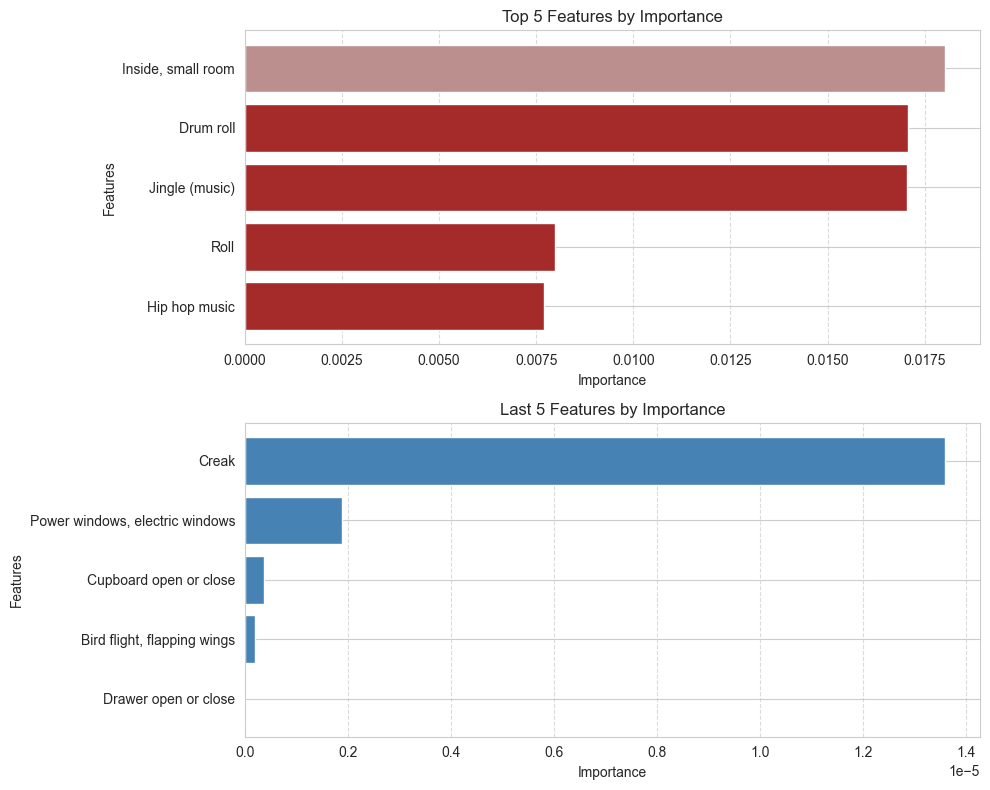

In [ ]:
# Top 5 and last 5 features
top_5_features = merged_top_features.head(5)
last_5_features = merged_top_features.tail(5)

music_features = {'Drum roll', 'Jingle (music)', 'Roll', 'Hip hop music', 'Music', 'Happy music'}

# Assign colors for the top 5 features
top_colors = ['brown' if feature in music_features else 'rosybrown' for feature in top_5_features['display_name']]

# Assign steelblue for the last 5 features
last_colors = ['steelblue' for _ in last_5_features['display_name']]

# Plot the top 5 features
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Top 5 features
axs[0].barh(top_5_features['display_name'], top_5_features['Importance'], color=top_colors)
axs[0].set_title('Top 5 Features by Importance')
axs[0].set_xlabel('Importance')
axs[0].set_ylabel('Features')
axs[0].invert_yaxis()
axs[0].grid(axis='x', linestyle='--', alpha=0.7)

# Last 5 features
axs[1].barh(last_5_features['display_name'], last_5_features['Importance'], color=last_colors)
axs[1].set_title('Last 5 Features by Importance')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].invert_yaxis()
axs[1].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
important_features = importance_df[importance_df['Importance'] > 0.05]['Feature']
# important_features = importance_df['Feature']
X_important = X[:, important_features.index]

In [ ]:
print(important_features)

Series([], Name: Feature, dtype: object)


## 3.4 Neural Network
### 3.4.1 Build a time variable
This is to exclude time influence on the popularity index. Because there maybe exists average music popularity index change during years.

In [ ]:
# time-related features from df_combined is intended to capture the temporal dynamics of the song's popularity
df_combined['daily_streams_diff'] = df_combined['daily_streams'].diff()
df_combined['growth_rate'] = df_combined['daily_streams'].pct_change()
df_combined['streams_rolling_mean'] = df_combined['daily_streams'].rolling(window=3).mean()
df_combined['streams_rolling_std'] = df_combined['daily_streams'].rolling(window=3).std()

df_combined.fillna(0, inplace=True)

In [ ]:
len(df_combined)

1225

In [ ]:
len(yamnet_features)

1230

In [ ]:

time_features = ['daily_streams_diff', 'growth_rate', 'streams_rolling_mean', 'streams_rolling_std']
X_time = df_combined[time_features].iloc[:len(yamnet_features)].values

# combine time feature with musical feature
X_combined = np.hstack((X_important, X_time))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_combined = scaler.fit_transform(X_combined)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


### 3.4.2 Build a neural network

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# neural network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32)

# make sure the predicted popularity score is in the range of [0, 100]
# if it is over 100, mark it as 100
y_pred = model.predict(X_test).flatten()
y_pred = np.clip(y_pred, 0, 100)  # 将预测值限制在 0-100

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Epoch 1/150


/Users/darcie/Downloads/Columbia/24 Fall/Python/Lectures/In-person class/pythonProject/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4667.5322 - mae: 67.9682 - val_loss: 4448.2769 - val_mae: 66.1604
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 4338.4644 - mae: 65.4822 - val_loss: 3917.8813 - val_mae: 61.9506
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 3669.2124 - mae: 60.0933 - val_loss: 2996.1301 - val_mae: 53.8698
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 2720.3276 - mae: 51.1669 - val_loss: 1891.4312 - val_mae: 41.0745
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 1499.0518 - mae: 36.4811 - val_loss: 1111.3701 - val_mae: 26.2630
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 681.7376 - mae: 22.2532 - val_loss: 833.2973 - val_mae: 17.8187
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 462.5376 - mae: 16.8928 - val_loss: 769.0128 - val_mae: 16.2905
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 360.8961 - mae: 14.9373 - val_loss: 681.0610 - val_mae: 15.1582
Epoc

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 24.37
R² Score: 0.54


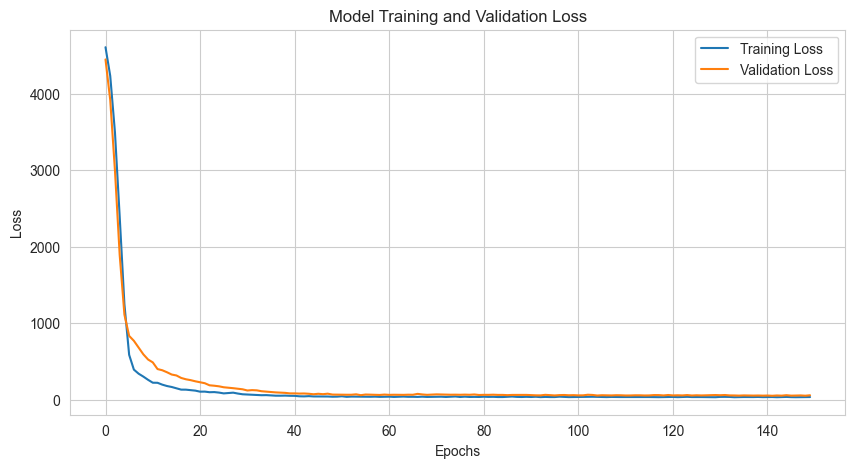

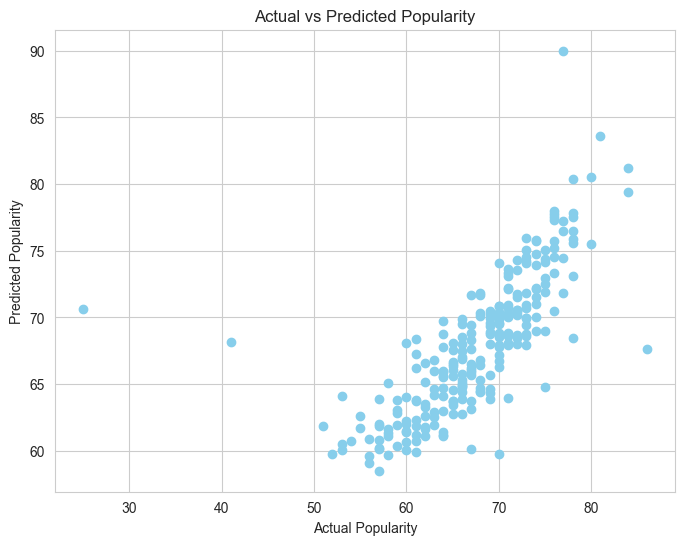

In [ ]:
# Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training and Validation Loss')
plt.show()

# actual value vs predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=1, color='skyblue')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.grid(True)
plt.show()

Number of outliers: 4


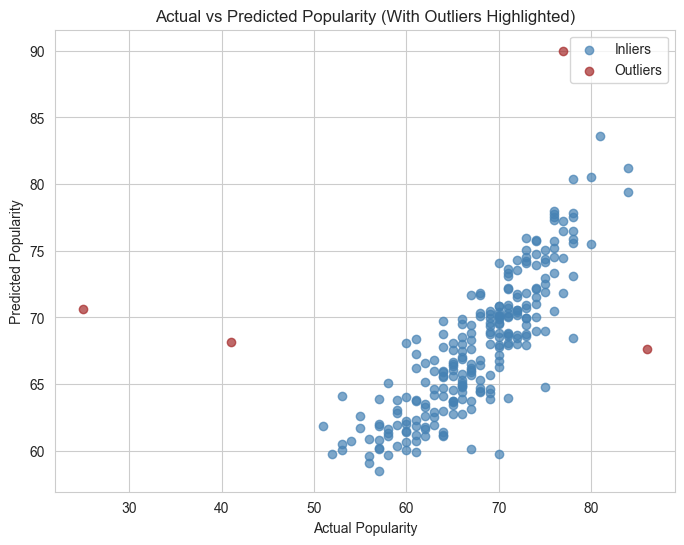

In [ ]:
# Calculate residuals (errors)
residuals = np.abs(y_test - y_pred)

# Determine the threshold for outliers (e.g., 3 times the standard deviation)
threshold = 3 * np.std(residuals)

# Identify outliers
outliers = np.where(np.abs(residuals) > threshold)[0]
print(f"Number of outliers: {len(outliers)}")


# actual value vs predicted value, with outliers in a different color
plt.figure(figsize=(8, 6))

# Plot inliers
inliers = np.setdiff1d(np.arange(len(y_test)), outliers)
plt.scatter(y_test[inliers], y_pred[inliers], alpha=0.7, color='steelblue', label='Inliers')

# Plot outliers
plt.scatter(y_test[outliers], y_pred[outliers], alpha=0.7, color='brown', label='Outliers')

plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity (With Outliers Highlighted)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Get the indices of the outliers
outlier_indices = outliers

# Map the indices back to the original test set
original_indices = y_test[outlier_indices]

# Retrieve the corresponding song names and popularity values from the dataset
outlier_songs = df_combined.iloc[original_indices][['track_name', 'popularity']]
print(outlier_songs)


        track_name  popularity
77     antifragile        73.0
25      yandel 150        72.0
41  nobody gets me        84.0
86  otro atardecer        75.0


In [ ]:
# delete outliers in both training dataset and testing dataset
X_train_filtered = np.delete(X_train, outlier_indices, axis=0)
y_train_filtered = np.delete(y_train, outlier_indices)
X_test = np.delete(X_test, outliers, axis=0)
y_test = np.delete(y_test, outliers)

# retrain the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_filtered.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_filtered, y_train_filtered, validation_split=0.2, epochs=150, batch_size=32)

# make sure the predicted popularity score is in the range of [0, 100]
# if it is over 100, mark it as 100
y_pred = model.predict(X_test).flatten()
y_pred = np.clip(y_pred, 0, 100)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Epoch 1/150


/Users/darcie/Downloads/Columbia/24 Fall/Python/Lectures/In-person class/pythonProject/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4638.3779 - mae: 67.7039 - val_loss: 3913.2590 - val_mae: 61.9069
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3262.4773 - mae: 55.8076 - val_loss: 1401.5406 - val_mae: 27.2889
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 709.0566 - mae: 20.5762 - val_loss: 745.5437 - val_mae: 18.2287
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 419.6115 - mae: 17.0215 - val_loss: 586.6389 - val_mae: 15.1102
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 323.1980 - mae: 14.2416 - val_loss: 448.8569 - val_mae: 12.7477
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 217.4475 - mae: 11.7177 - val_loss: 344.0079 - val_mae: 11.6307
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 230.2517 - mae: 11.4247 - val_loss: 292.2996 - val_mae: 10.7080
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 173.5544 - mae: 10.4190 - val_loss: 250.5525 - val_mae: 9.8613
Epoch 9/150
25/25 ━━━━━

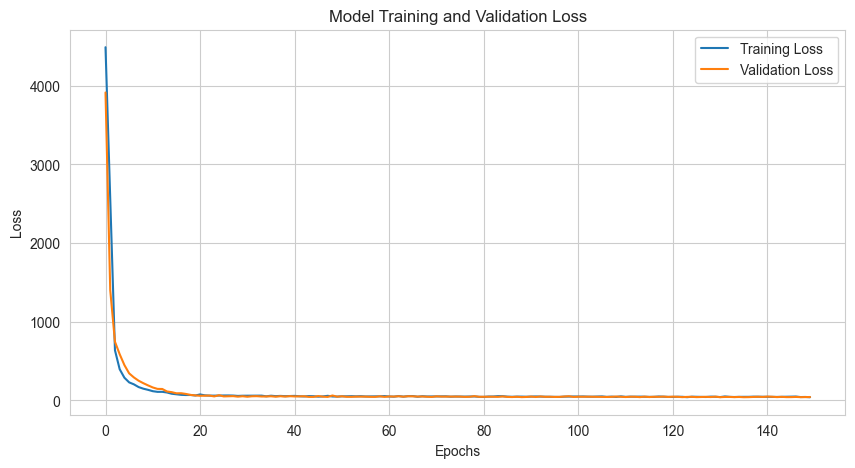

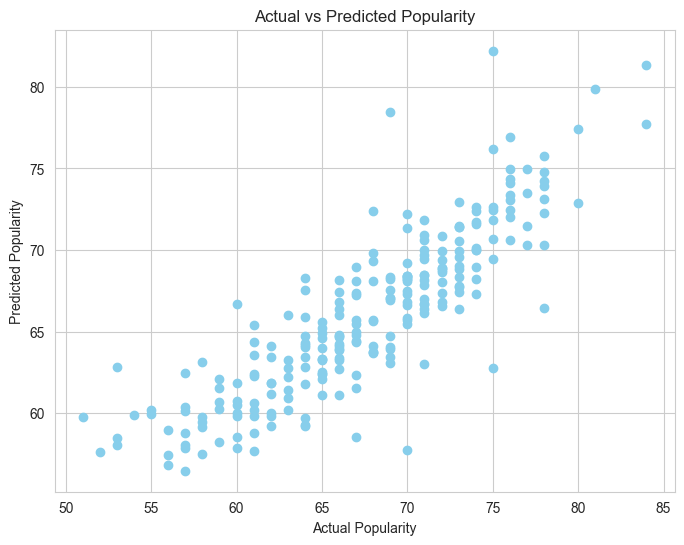

In [ ]:
# loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training and Validation Loss')
plt.show()

# actual value vs predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=1, color='skyblue')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.grid(True)
plt.show()

# Include the follower count of the artist into the model

### Find the unique artist names from 2022-2023 data

In [ ]:
# get unique artist name from 2022 and 2023 data
unique_artists = spotify_data['artist_name'].unique()
print(f"Number of unique artists: {len(unique_artists)}")
unique_artists

Number of unique artists: 2258


array(['Lewis Capaldi', 'Post Malone', 'Billie Eilish', ...,
       'guyon waton', 'lucky brown', 'mc danone'], dtype=object)

In [ ]:
def get_artist_followers(artist_name):
    """
    Get the number of followers for an artist on Spotify.

    Parameters:
        artist_name (str): The name of the artist.

    Returns:
        int: The number of followers. Returns None if the artist is not found.
    """
    try:
        # Search for the artist on Spotify
        results = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)

        # Check if the search returns any artist
        if results['artists']['items']:
            # Return the total number of followers for the first search result
            return results['artists']['items'][0]['followers']['total']
        else:
            # If no artist is found, return None
            return None
    except Exception as e:
        # Handle exceptions and print the error
        print(f"Error fetching followers for {artist_name}: {e}")
        return None


In [ ]:
# get followers data
artist_followers = {}
for artist in unique_artists:
    followers = get_artist_followers(artist)
    artist_followers[artist] = followers
    print(f"Fetched followers for {artist}: {followers}")

Fetched followers for Lewis Capaldi: 13041511
Fetched followers for Post Malone: 46002055
Fetched followers for Billie Eilish: 103636544
Fetched followers for Juice WRLD: 36970287
Fetched followers for Drake: 94133053
Fetched followers for Lady Gaga: 33270038
Fetched followers for Ariana Grande: 101781212
Fetched followers for Calvin Harris: 22970612
Fetched followers for XXXTENTACION: 47979544
Fetched followers for Marshmello: 33946078
Fetched followers for Travis Scott: 35213935
Fetched followers for Camila Cabello: 34209288
Fetched followers for Halsey: 21786345
Fetched followers for The Weeknd: 95971547
Fetched followers for Charlie Puth: 23681287
Fetched followers for 5 Seconds of Summer: 10123527
Fetched followers for Kendrick Lamar: 35133587
Fetched followers for Dean Lewis: 3426250
Fetched followers for Alec Benjamin: 5313504
Fetched followers for benny blanco: 1260909
Fetched followers for Maroon 5: 43455229
Fetched followers for Panic! At The Disco: 12442252
Fetched followers

In [ ]:
artist_followers_df = pd.DataFrame(list(artist_followers.items()), columns=['artist_name', 'followers'])
artist_followers_df.head()

,artist_name,followers
0,Lewis Capaldi,13041511.0
1,Post Malone,46002055.0
2,Billie Eilish,103636544.0
3,Juice WRLD,36970287.0
4,Drake,94133053.0


In [ ]:
# combine the follower number into df_combined
df_combined = spotify_data.merge(artist_followers_df, on='artist_name', how='left')

df_combined.head()

,id,artist_name,track_name,daily_streams,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,popularity,followers
0,7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,Someone You Loved,1397993.0,3674681439,0.751,0.501,182161.0,0.405,0.000000,1.0,0.1050,-5.679,0.0319,109.891,0.446,86.0,13041511.0
1,0RiRZpuVRbi7oqRdSMwhQY,Post Malone,Sunflower,1373058.0,3595013796,0.533,0.755,157560.0,0.522,0.000000,2.0,0.0685,-4.368,0.0575,89.960,0.925,82.0,46002055.0
2,0e7ipj03S05BNilyu5bRzt,Post Malone,rockstar,553309.0,3064042420,0.124,0.585,218147.0,0.520,0.000077,5.0,0.1310,-6.136,0.0713,159.798,0.129,80.0,46002055.0
3,0u2P5u6lvoDfwTYjAADbn4,Billie Eilish,lovely,1488403.0,3061154453,0.934,0.351,200186.0,0.296,0.000000,4.0,0.0950,-10.109,0.0333,115.284,0.120,86.0,103636544.0
4,285pBltuF7vW8TeWk8hdRR,Juice WRLD,Lucid Dreams,953495.0,2674895374,0.349,0.511,239836.0,0.566,0.000000,6.0,0.3400,-7.230,0.2000,83.903,0.218,82.0,36970287.0


### Train the model with the follower count as a new feature

#### Random Forest--consider follower count

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 10.42
R² Score: 0.75


In [ ]:
followers_values = df_combined['followers'].iloc[:len(X_combined)].values.reshape(-1, 1)

X_with_followers = np.hstack((X_combined, followers_values))

X_train, X_test, y_train, y_test = train_test_split(X_with_followers, y, test_size=0.2, random_state=42)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/Users/darcie/Downloads/Columbia/24 Fall/Python/Lectures/In-person class/pythonProject/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32)

y_pred = model.predict(X_test).flatten()

residuals = np.abs(y_test - y_pred)
threshold = 3 * np.std(residuals)
outliers = np.where(residuals > threshold)[0]


Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7095726899200.0000 - mae: 989852.3750 - val_loss: 58288300032.0000 - val_mae: 140910.6406
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 396691996672.0000 - mae: 323493.2188 - val_loss: 122685095936.0000 - val_mae: 204411.7188
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 294025101312.0000 - mae: 271423.7812 - val_loss: 32757463040.0000 - val_mae: 105646.3750
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 195514515456.0000 - mae: 224624.5469 - val_loss: 55128684.0000 - val_mae: 4292.9868
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 201176317952.0000 - mae: 215345.2969 - val_loss: 238020480.0000 - val_mae: 9046.6709
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 144933601280.0000 - mae: 193482.1875 - val_loss: 8756541440.0000 - val_mae: 54556.0508
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81508827136.0000 - mae: 154014.7031 - val_loss: 1109811814

In [ ]:
X_train_filtered = np.delete(X_train, outliers, axis=0)
y_train_filtered = np.delete(y_train, outliers)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_filtered.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


/Users/darcie/Downloads/Columbia/24 Fall/Python/Lectures/In-person class/pythonProject/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_filtered, y_train_filtered, validation_split=0.2, epochs=150, batch_size=32)

X_train_filtered = np.delete(X_train, outlier_indices, axis=0)
y_train_filtered = np.delete(y_train, outlier_indices)


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3691735416832.0000 - mae: 918002.5625 - val_loss: 49793314816.0000 - val_mae: 129253.2188
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 265959178240.0000 - mae: 243930.4375 - val_loss: 93185630208.0000 - val_mae: 176835.1719
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 177865080832.0000 - mae: 224253.2656 - val_loss: 3066665216.0000 - val_mae: 32044.8359
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 123909398528.0000 - mae: 175182.0938 - val_loss: 7861904896.0000 - val_mae: 51333.7852
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 135334510592.0000 - mae: 185670.9688 - val_loss: 3700521728.0000 - val_mae: 35205.2109
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 115261341696.0000 - mae: 147787.2812 - val_loss: 2381790464.0000 - val_mae: 28235.8066
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 97699823616.0000 - mae: 140227.0625 - val_loss: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_names = ['Feature ' + str(i) for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


     Feature  Importance
2  Feature 2    0.584732
0  Feature 0    0.173555
1  Feature 1    0.141392
3  Feature 3    0.067575
4  Feature 4    0.032746


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_filtered.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_filtered, y_train_filtered, validation_split=0.2, epochs=150, batch_size=32)

y_pred = model.predict(X_test).flatten()
y_pred = np.clip(y_pred, 0, 100)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Epoch 1/150


/Users/darcie/Downloads/Columbia/24 Fall/Python/Lectures/In-person class/pythonProject/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2831148384256.0000 - mae: 782013.7500 - val_loss: 57502216192.0000 - val_mae: 139869.6875
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 621111148544.0000 - mae: 348041.3125 - val_loss: 3782269184.0000 - val_mae: 35840.8242
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 232204713984.0000 - mae: 228319.8125 - val_loss: 60599758848.0000 - val_mae: 143588.7031
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 195927605248.0000 - mae: 206820.8438 - val_loss: 61599399936.0000 - val_mae: 144768.4688
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 206567047168.0000 - mae: 201629.2656 - val_loss: 25363425280.0000 - val_mae: 92879.3125
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 124770770944.0000 - mae: 165591.9375 - val_loss: 19672682496.0000 - val_mae: 81793.7656
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 102107299840.0000 - mae: 158297.7031 - val_loss: 1327634

# **Part 4: Additional regressions - audio features + streams, genre**

## **Part 4.1 Obtaining genre using Last.FM API**

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import requests


In [ ]:
# load the data
df_combined = pd.read_csv('spotify_combined.csv')

In [ ]:
LASTFM_API_KEY = 'da24d2ff611406c4ec92042b31b37f9a'

def get_genres_from_lastfm(song_data: pd.DataFrame) -> dict:
    """
    批量获取 Last.fm 的流派信息。

    Parameters:
        song_data (DataFrame): 包含 'track_name' 和 'artist_name' 列的 DataFrame。

    Returns:
        dict: 歌曲名称与流派的映射字典。
    """
    genres_dict = {}

    for _, row in tqdm(song_data.iterrows(), total=len(song_data), desc="Fetching genres from Last.fm"):
        track_name = row['track_name']
        artist_name = row['artist_name']
        try:
            # 调用 Last.fm API
            url = f"http://ws.audioscrobbler.com/2.0/"
            params = {
                'method': 'track.getInfo',
                'api_key': LASTFM_API_KEY,
                'track': track_name,
                'artist': artist_name,
                'format': 'json'
            }
            response = requests.get(url, params=params)
            data = response.json()

            # 提取流派信息
            if 'track' in data and 'toptags' in data['track']:
                tags = data['track']['toptags']['tag']
                genres = [tag['name'] for tag in tags]
                genres_dict[track_name] = genres if genres else ["Unknown"]
            else:
                genres_dict[track_name] = ["Unknown"]
        except Exception as e:
            print(f"Error fetching genre for {track_name}: {e}")
            genres_dict[track_name] = ["Unknown"]

    return genres_dict


In [ ]:
track_genres_lastfm = get_genres_from_lastfm(df_combined[['track_name', 'artist_name']])
df_combined['genres'] = df_combined['track_name'].map(track_genres_lastfm)
df_combined.dropna()

Fetching genres from Last.fm:  23%|██▎       | 414/1820 [00:54<05:33,  4.21it/s]

Error fetching genre for boy's a liar: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))


Fetching genres from Last.fm: 100%|██████████| 1820/1820 [04:14<00:00,  7.14it/s]


In [ ]:
all_genres = ['electronic', 'hip hop', 'pop', 'rock', 'jazz', 'classical', 'folk', 'metal', 'blues', 'country', 'reggae', 'latin', 'rap', 'indie', 'punk', 'funk', 'soul', 'dance', 'r&b', 'disco', 'k-pop', 'house', 'experimental', 'afrobeats', 'synthpop', 'alternative', 'soundtrack', 'power pop', 'dream pop', 'brazilian', 'emo', 'acoustic', 'british', 'american', 'party', 'urban']

In [ ]:
def add_top_genres(df: pd.DataFrame, genres_column: str) -> pd.DataFrame:
    """
    Add top N genres as binary columns to the DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame with a column containing lists of genres.
        genres_column (str): Name of the column in the DataFrame containing genre lists.
        top_n (int): Number of top genres to include as binary columns.

    Returns:
        pd.DataFrame: DataFrame with top N genre columns added.
    """
    # Extract all genres into a single list and count occurrences
    all_genres = ['electronic', 'hip hop', 'pop', 'rock', 'jazz', 'classical', 'folk', 'metal', 'blues', 'country', 'reggae', 'latin', 'rap', 'indie', 'punk', 'funk', 'soul', 'dance', 'r&b', 'disco', 'k-pop', 'house', 'experimental', 'afrobeats', 'synthpop', 'alternative', 'soundtrack', 'power pop', 'dream pop', 'brazilian', 'emo', 'acoustic', 'british', 'american', 'party', 'urban']

    # Add binary columns for each top genre
    for genre in all_genres:
        df[genre] = df[genres_column].apply(lambda x: 1 if genre in x else 0)

    return df


In [ ]:
df_genres = add_top_genres(df_combined, 'genres')
df_genres.to_csv('spotify_combined_with_genre.csv', index=False)

,id,artist_name,track_name,daily_streams,streams,acousticness,danceability,duration_ms,energy,instrumentalness,...,soundtrack,power pop,dream pop,brazilian,emo,acoustic,british,american,party,urban
0,4Dvkj6JhhA12EX05fT7y2e,harry styles,as it was,1618590.0,3633339736,0.34200,0.520,167303.0,0.731,0.001010,...,0,0,0,0,0,0,1,0,0,0
1,1Qrg8KqiBpW07V7PNxwwwL,sza,kill bill,1918330.0,2186838653,0.05210,0.644,153947.0,0.735,0.144000,...,0,0,0,0,0,0,0,0,0,0
2,3tt9i3Hhzq84dPS8H7iSiJ,manuel turizo,la bachata,1040570.0,1980184177,0.58300,0.835,162638.0,0.679,0.000002,...,0,0,0,0,0,0,0,0,0,0
3,6Sq7ltF9Qa7SNFBsV5Cogx,bad bunny,me porto bonito,730921.0,1943322630,0.09010,0.911,178567.0,0.712,0.000027,...,0,0,0,0,0,0,0,0,0,0
4,4uUG5RXrOk84mYEfFvj3cK,david guetta,i’m good (blue),1387697.0,1889030676,0.00383,0.561,175238.0,0.965,0.000007,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,5WV6br0BPUzhJwyBty80s0,juliette,tengo,17825.0,101046577,0.25000,0.729,129692.0,0.855,0.000000,...,0,0,0,0,0,0,0,0,0,0
1816,6xbi77Vq9RALnKc59kSXIS,guyon waton,sanes,122809.0,100985019,0.17600,0.610,301846.0,0.635,0.000002,...,0,0,0,0,0,0,0,0,0,0
1817,5S8zFPQ3KIlF2y9Kt8mRhg,lucky brown,¿cuál es su nombre?,81567.0,100794660,0.04880,0.815,183400.0,0.733,0.000002,...,0,0,0,0,0,0,0,0,0,0
1818,0b83L1ToHRiwlpmUAjiCHc,daniel caesar,valentina,204546.0,100490736,0.62200,0.754,154532.0,0.311,0.336000,...,0,0,0,0,0,0,0,0,0,0


## **Part 4.2 Additional regressions**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#spotify_data = df_2023.dropna()
spotify_data = pd.read_csv('spotify_combined_with_genre.csv')

print(spotify_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1820 non-null   object 
 1   artist_name       1820 non-null   object 
 2   track_name        1820 non-null   object 
 3   daily_streams     1820 non-null   float64
 4   streams           1820 non-null   int64  
 5   acousticness      1820 non-null   float64
 6   danceability      1820 non-null   float64
 7   duration_ms       1820 non-null   float64
 8   energy            1820 non-null   float64
 9   instrumentalness  1820 non-null   float64
 10  key               1820 non-null   float64
 11  liveness          1820 non-null   float64
 12  loudness          1820 non-null   float64
 13  speechiness       1820 non-null   float64
 14  tempo             1820 non-null   float64
 15  valence           1820 non-null   float64
 16  popularity        1820 non-null   float64


In [ ]:
spotify_data['genres'].unique()

array(["['pop', 'synthpop', 'rock', 'indie pop', 'british']",
       "['pop', 'MySpotigramBot', 'psychedelic pop', 'trip hop', 'Neo-Soul']",
       "['spanish', 'latin', 'summer', 'latin pop', 'bachata']",
       "['Reggaeton', 'MySpotigramBot', 'latin', 'fire', 'king of pop']",
       "['Unknown']",
       "['MySpotigramBot', 'Quevedo', 'argentina', 'summer', 'Reggaeton']",
       "['pop', 'Trash', 'garbage', 'jackson mahomes', 'shit']",
       "['pop', 'electropop', 'Radio', 'EDM', '2020s']",
       "['Reggaeton', 'spanish', 'latin', 'summer', 'dancehall']",
       "['afrobeats', 'summer', '2022', 'MySpotigramBot', 'pop']",
       "['C', 'f', 'E', 'i', 'x']",
       "['rock', 'alternative', 'energy', 'Pop-Rock', 'a subtle use of vocal harmony']",
       "['Ballad', 'piano', 'pop', 'adult contemporary', 'Masterpiece']",
       "['Reggaeton', 'latin', 'king of pop', 'rey del pop']",
       "['sad', 'indie pop', 'MySpotigramBot', 'indie', 'dream pop']",
       "['Reggaeton', 'latin', 'l

## Regression: predicting popularity score using audio features only



In [ ]:
# define the features
X = spotify_data[['acousticness', 'danceability', 'energy', 'tempo',
                  'instrumentalness', 'key', 'liveness', 'loudness',
                  'speechiness', 'valence', 'duration_ms']]
X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable

y = spotify_data['popularity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# initialize the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coef_df)
print("Intercepts:", model.intercept_)

model.score(X_train, y_train)

             Feature  Coefficient
0       acousticness     0.136301
1       danceability    -2.755362
2             energy    -0.224986
3              tempo    -0.002640
4   instrumentalness     0.560997
5           liveness    -5.032594
6           loudness    -0.085771
7        speechiness    -5.489985
8            valence    -1.385224
9        duration_ms    -0.000012
10           key_0.0    -0.114809
11           key_1.0     0.021787
12           key_2.0    -0.791333
13           key_3.0    -0.151387
14           key_4.0     0.495270
15           key_5.0     0.118394
16           key_6.0     0.195304
17           key_7.0    -0.774018
18           key_8.0     1.276848
19           key_9.0    -0.404156
20          key_10.0     0.270242
21          key_11.0    -0.142143
Intercepts: 74.6322823954218


0.03108185131589236

 (MSE): 51.38572157343286
 (R^2): 0.0021815632590094225


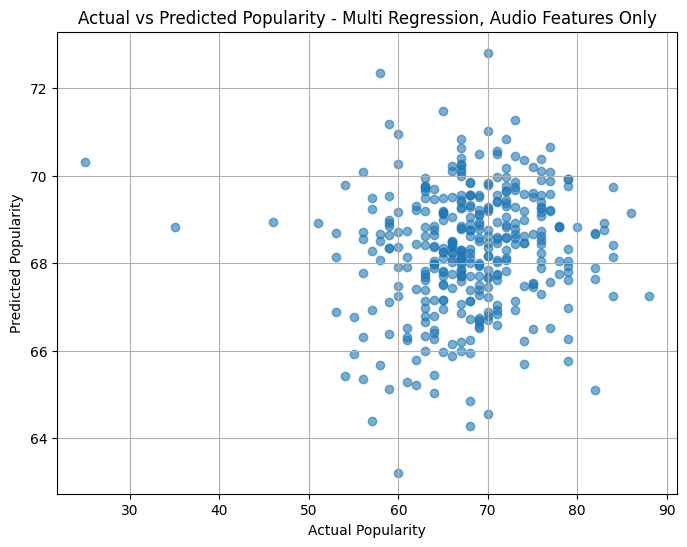

In [ ]:
# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" (MSE):", mse)
print(" (R^2):", r2)

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Multi Regression, Audio Features Only")
plt.grid(True)
plt.show()


## Regression: predicting popularity score using audio features and number of streams

In [ ]:
# define the features
X = spotify_data[['acousticness', 'danceability', 'energy', 'tempo',
                  'instrumentalness', 'key', 'liveness', 'loudness',
                  'speechiness', 'valence', 'duration_ms', 'streams']]
X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable

y = spotify_data['popularity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# initialize the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coef_df)

model.score(X_train, y_train)

Intercept: 70.18609222166612
             Feature   Coefficient
0       acousticness  7.031969e-01
1       danceability -3.867064e+00
2             energy -2.671083e-01
3              tempo -3.086039e-03
4   instrumentalness  1.545454e+00
5           liveness -4.066217e+00
6           loudness -8.128903e-02
7        speechiness -2.787142e+00
8            valence -8.077247e-01
9        duration_ms -1.140484e-05
10           streams  1.484816e-08
11           key_0.0 -2.764537e-01
12           key_1.0  5.818027e-02
13           key_2.0 -6.001177e-01
14           key_3.0  1.985809e-01
15           key_4.0  2.723196e-01
16           key_5.0 -1.600221e-01
17           key_6.0  1.909653e-01
18           key_7.0 -8.569808e-01
19           key_8.0  9.009343e-01
20           key_9.0 -4.003504e-01
21          key_10.0  6.163336e-01
22          key_11.0  5.661081e-02


0.3228000399890585

 (MSE): 36.51732080212758
 (R^2): 0.2908992062186594


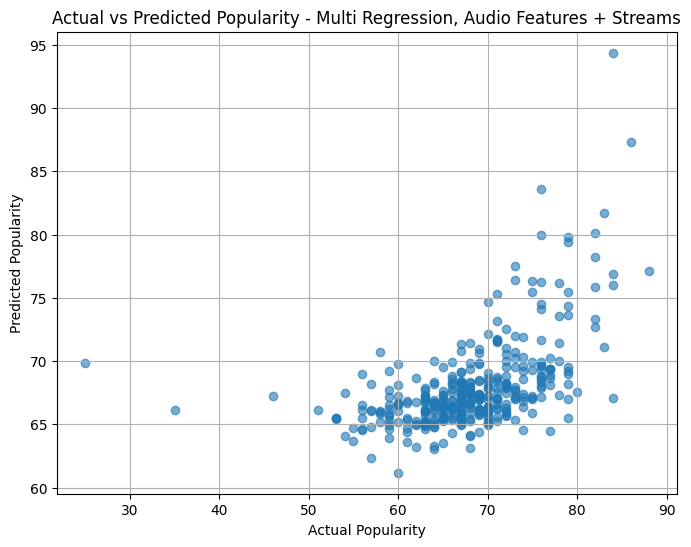

In [ ]:
# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" (MSE):", mse)
print(" (R^2):", r2)

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Multi Regression, Audio Features + Streams")
plt.grid(True)
plt.show()

## Regression: predicting popularity score using audio features and genre

In [ ]:
to_remove = ['id', 'artist_name', 'track_name', 'daily_streams', 'popularity', 'genres', 'streams']
predictors = [item for item in spotify_data.columns.to_list() if item not in to_remove]
print(predictors)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'electronic', 'hip hop', 'pop', 'rock', 'jazz', 'classical', 'folk', 'metal', 'blues', 'country', 'reggae', 'latin', 'rap', 'indie', 'punk', 'funk', 'soul', 'dance', 'r&b', 'disco', 'k-pop', 'house', 'experimental', 'afrobeats', 'synthpop', 'alternative', 'soundtrack', 'power pop', 'dream pop', 'brazilian', 'emo', 'acoustic', 'british', 'american', 'party', 'urban']


In [ ]:
# define the features
X = spotify_data[predictors]
X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable

y = spotify_data['popularity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# initialize the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

#print("Regression Coeff:", model.coef_)
print("Intercept:", model.intercept_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coef_df)

model.score(X_train, y_train)

Intercept: 72.66863587830728
             Feature   Coefficient
0       acousticness  3.310651e-01
1       danceability -1.512776e+00
2        duration_ms -1.518188e-05
3             energy  5.316639e-01
4   instrumentalness  4.398721e-01
5           liveness -3.977242e+00
6           loudness -1.116621e-01
7        speechiness -2.985405e+00
8              tempo -2.623719e-03
9            valence -1.420215e+00
10        electronic  7.089455e-02
11           hip hop -2.788094e-01
12               pop  1.379176e+00
13              rock  1.397690e+00
14              jazz  5.648655e-01
15         classical -6.813994e-15
16              folk  7.151973e-01
17             metal  9.357214e-01
18             blues  3.552714e-15
19           country  4.471877e+00
20            reggae -1.101191e-01
21             latin  4.146630e+00
22               rap -3.518728e-01
23             indie  6.354724e+00
24              punk  4.954739e-01
25              funk -9.971557e-01
26              soul  2.20

0.090087599323742

 (MSE): 52.12824313789177
 (R^2): -0.012236872135267918


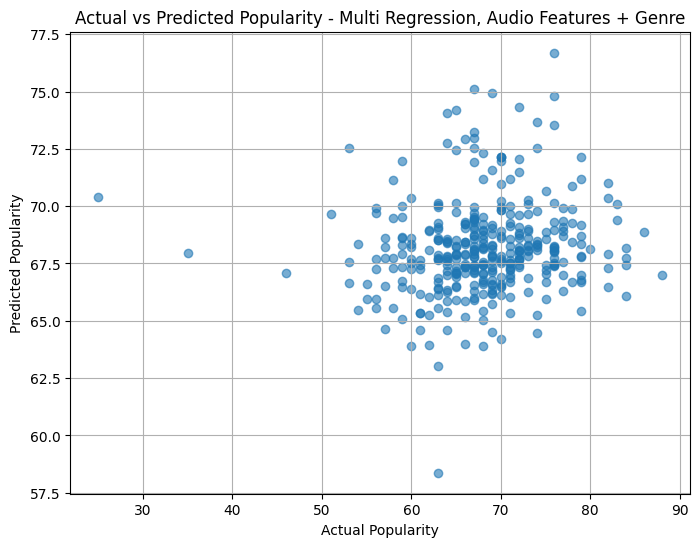

In [ ]:
# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" (MSE):", mse)
print(" (R^2):", r2)

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Multi Regression, Audio Features + Genre")
plt.grid(True)
plt.show()

## Regression: predicting popularity score using audio features, streams, genre

In [ ]:
to_remove = ['id', 'artist_name', 'track_name', 'daily_streams', 'popularity', 'genres']
predictors = [item for item in spotify_data.columns.to_list() if item not in to_remove]
print(predictors)

['streams', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'electronic', 'hip hop', 'pop', 'rock', 'jazz', 'classical', 'folk', 'metal', 'blues', 'country', 'reggae', 'latin', 'rap', 'indie', 'punk', 'funk', 'soul', 'dance', 'r&b', 'disco', 'k-pop', 'house', 'experimental', 'afrobeats', 'synthpop', 'alternative', 'soundtrack', 'power pop', 'dream pop', 'brazilian', 'emo', 'acoustic', 'british', 'american', 'party', 'urban']


In [ ]:
# define the features
X = spotify_data[predictors]
X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable

y = spotify_data['popularity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# initialize the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

#print("Regression Coeff:", model.coef_)
print("Intercept:", model.intercept_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coef_df)

model.score(X_train, y_train)

Intercept: 69.00276487559039
             Feature   Coefficient
0            streams  1.476584e-08
1       acousticness  7.005432e-01
2       danceability -2.250573e+00
3        duration_ms -1.199381e-05
4             energy  1.046706e-01
5   instrumentalness  1.517296e+00
6           liveness -3.833672e+00
7           loudness -5.715298e-02
8        speechiness -1.577414e+00
9              tempo -2.757487e-03
10           valence -9.656739e-01
11        electronic -1.376251e-01
12           hip hop  1.142973e-02
13               pop -5.758637e-01
14              rock  5.357886e-02
15              jazz  1.647268e+00
16         classical -9.436896e-15
17              folk  1.976211e+00
18             metal -9.494282e-01
19             blues  2.220446e-16
20           country  4.123837e+00
21            reggae  1.121314e-01
22             latin -1.304615e+00
23               rap -3.136909e-01
24             indie  3.248011e+00
25              punk -7.801221e-03
26              funk -1.11

0.3424530736139879

 (MSE): 36.30257629618869
 (R^2): 0.2950691588952692


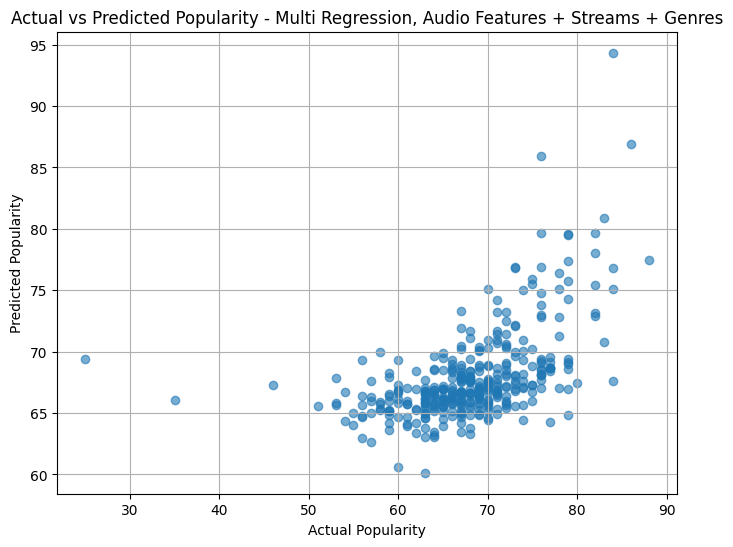

In [ ]:
# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" (MSE):", mse)
print(" (R^2):", r2)

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Multi Regression, Audio Features + Streams + Genres")
plt.grid(True)
plt.show()

## Regression: predicting popularity score solely using # streams

In [ ]:
# define the features
X = spotify_data[['streams']]
y = spotify_data[['popularity']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# initialize the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

print("Intercepts:", model.intercept_)
print("Coefficient:", model.coef_)

model.score(X_train, y_train)

Intercepts: [64.03723063]
Coefficient: [[1.48924499e-08]]


0.296580106443298

 (MSE): 36.35257525489439
 (R^2): 0.29409826890313173


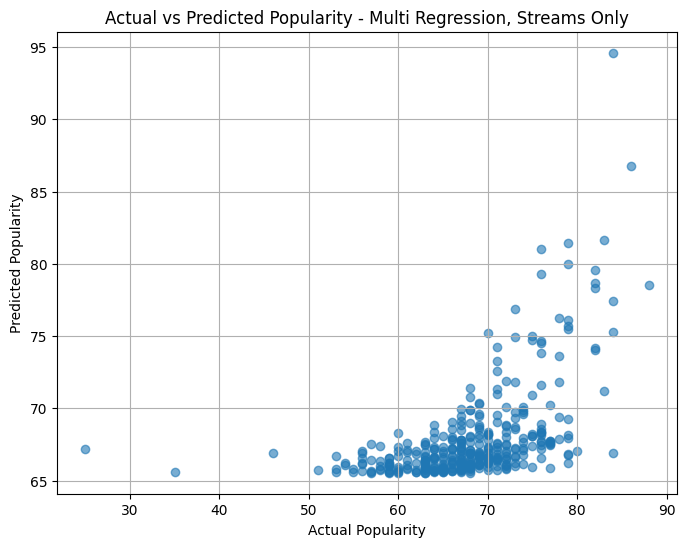

In [ ]:
# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" (MSE):", mse)
print(" (R^2):", r2)

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Multi Regression, Streams Only")
plt.grid(True)
plt.show()

# Random Forest

['streams', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'electronic', 'hip hop', 'pop', 'rock', 'jazz', 'classical', 'folk', 'metal', 'blues', 'country', 'reggae', 'latin', 'rap', 'indie', 'punk', 'funk', 'soul', 'dance', 'r&b', 'disco', 'k-pop', 'house', 'experimental', 'afrobeats', 'synthpop', 'alternative', 'soundtrack', 'power pop', 'dream pop', 'brazilian', 'emo', 'acoustic', 'british', 'american', 'party', 'urban']
Mean Squared Error (MSE): 34.01
R² Score: 0.34


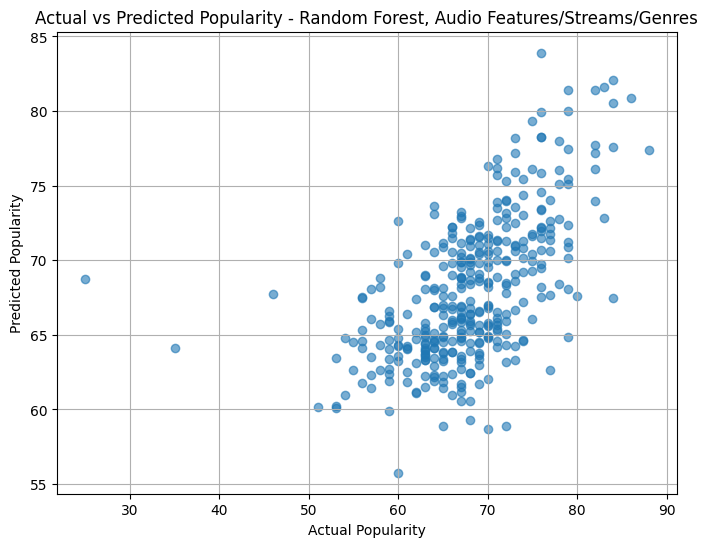

<ipython-input-37-3e24336984f1>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


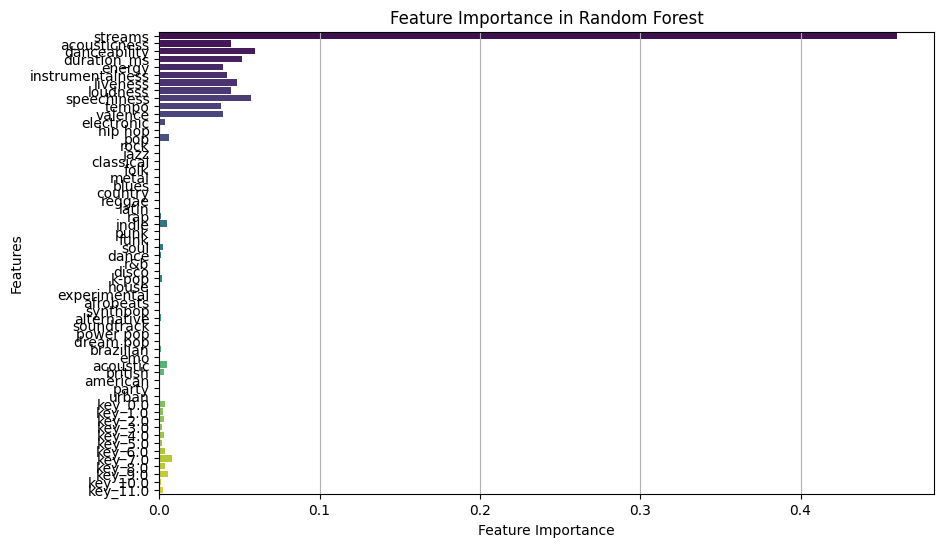

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Using all the data from 2018 to 2023
# dataframes = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Concatenate all the dataframes
data = pd.read_csv('spotify_combined_with_genre.csv')

# get predictor variables - audio features, streams, genre (dummy variables)
to_remove = ['id', 'artist_name', 'track_name', 'daily_streams', 'popularity', 'genres']
predictors = [item for item in data.columns.to_list() if item not in to_remove]
print(predictors)

# Choose the features and target variable, 'popularity' as the target variable
X = data[predictors]
X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable
y = data['popularity']

# seperate training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build random forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# prediction
y_pred = rf_model.predict(X_test)

# Evaluation on model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Random Forest, Audio Features/Streams/Genres")
plt.grid(True)
plt.show()


# importance of features
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.grid(True, axis='x')
plt.show()


Mean Squared Error (MSE): 34.24
R² Score: 0.34


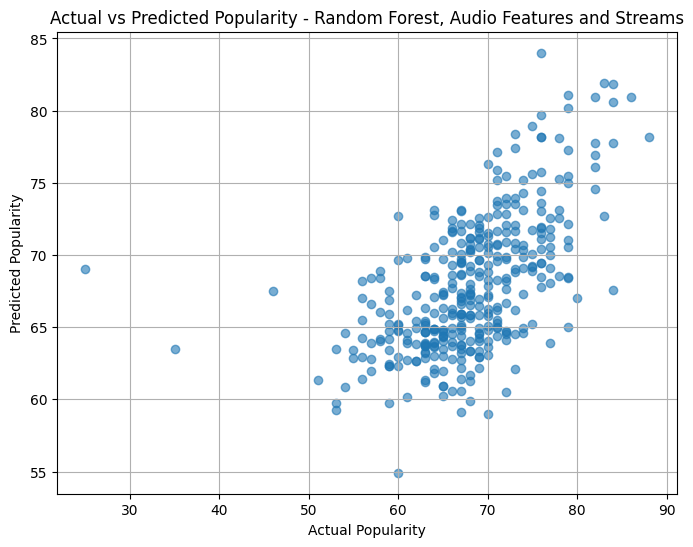

<ipython-input-36-34bd6a947ff8>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


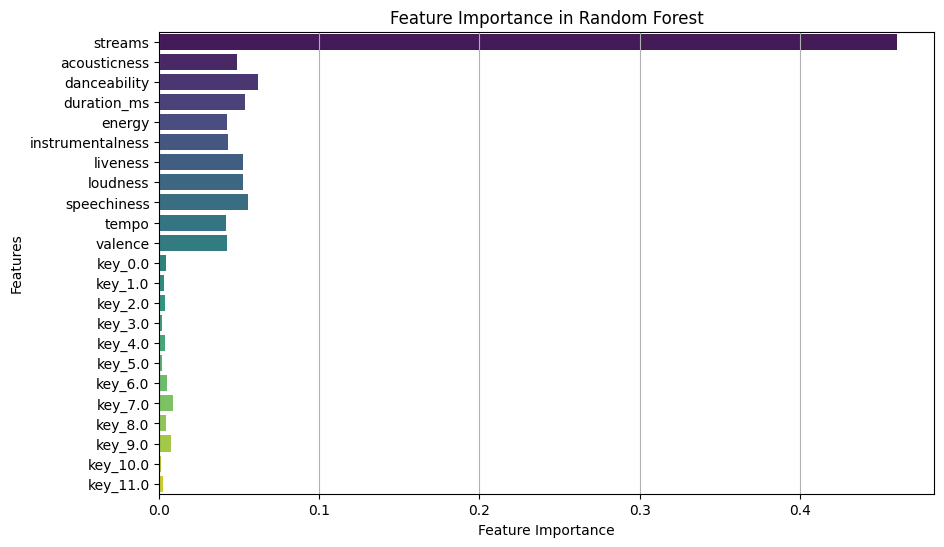

In [ ]:
# remove genre dummy variables from predictors
to_remove = ['electronic', 'hip hop', 'pop', 'rock', 'jazz', 'classical', 'folk', 'metal', 'blues', 'country', 'reggae', 'latin', 'rap', 'indie', 'punk', 'funk', 'soul', 'dance', 'r&b', 'disco', 'k-pop', 'house', 'experimental', 'afrobeats', 'synthpop', 'alternative', 'soundtrack', 'power pop', 'dream pop', 'brazilian', 'emo', 'acoustic', 'british', 'american', 'party', 'urban']
predictors = [item for item in predictors if item not in to_remove]
print(predictors)

# Choose the features and target variable, 'popularity' as the target variable
X = data[predictors]
X = pd.get_dummies(X, columns=['key'], prefix='key')   # encode 'key' as a dummy variable
y = data['popularity']

# seperate training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build random forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# prediction
y_pred = rf_model.predict(X_test)

# Evaluation on model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Actual Value and predicted value
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity - Random Forest, Audio Features and Streams")
plt.grid(True)
plt.show()


# importance of features
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.grid(True, axis='x')
plt.show()

